In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils

In [3]:
df = pd.read_csv('NF-ToN-IoT.csv')
#df.drop(df.loc[df['Label'] == 'Label'].index, inplace=True)

In [5]:
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [6]:
df.Label.value_counts()

1    92540
0     7460
Name: Label, dtype: int64

In [7]:
df.Attack.value_counts()

injection    46556
password     21051
ddos         18854
Benign        7460
scanning      5166
dos            906
mitm             7
Name: Attack, dtype: int64

In [8]:
df = df.drop(columns=['IPV4_SRC_ADDR', 'IPV4_DST_ADDR'])

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)    
print(df.isna().any(axis=1).sum(), "rows with at least one NaN to remove")
df.dropna(inplace=True)

0 rows with at least one NaN to remove


In [10]:
print(df.duplicated().sum(), "fully duplicate rows to remove")
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

192 fully duplicate rows to remove


In [11]:
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,63318,443,6,91.00,181,165,2,1,24,327,0,Benign
1,57442,15600,17,0.00,63,0,1,0,0,0,0,Benign
2,57452,15600,17,0.00,63,0,1,0,0,0,0,Benign
3,138,138,17,10.16,472,0,2,0,0,0,0,Benign
4,51989,15600,17,0.00,63,0,1,0,0,0,0,Benign


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99808 entries, 0 to 99807
Data columns (total 12 columns):
L4_SRC_PORT                   99808 non-null int64
L4_DST_PORT                   99808 non-null int64
PROTOCOL                      99808 non-null int64
L7_PROTO                      99808 non-null float64
IN_BYTES                      99808 non-null int64
OUT_BYTES                     99808 non-null int64
IN_PKTS                       99808 non-null int64
OUT_PKTS                      99808 non-null int64
TCP_FLAGS                     99808 non-null int64
FLOW_DURATION_MILLISECONDS    99808 non-null int64
Label                         99808 non-null int64
Attack                        99808 non-null object
dtypes: float64(1), int64(10), object(1)
memory usage: 9.1+ MB


In [13]:
del df['Attack']

In [14]:
df.to_csv('processed.csv')

In [15]:
X = df.drop(["Label"],axis =1)
y = df["Label"]

In [16]:
features = X.columns
features

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS'],
      dtype='object')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(79846, 10) (79846,)
(19962, 10) (19962,)


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [69]:
ML_Model = []
accuracy = []
precision = []
recall = []
fscore = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    fscore.append(round(d, 3))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [21]:
X_train=X_train.values
X_test=X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

# CNN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

verbose, epoch, batch_size = 1, 100, 2
activationFunction='relu'

def CNN():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(2, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = CNN()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 9, 128)            384       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 128)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________


In [27]:
modelhistory = cnnmodel.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/5
31938/31938 [==============================] - 86s 3ms/step - loss: 62.1214 - accuracy: 0.9659 - val_loss: 18.4991 - val_accuracy: 0.9835
Epoch 2/5
31938/31938 [==============================] - 86s 3ms/step - loss: 21.9590 - accuracy: 0.9715 - val_loss: 2.6799 - val_accuracy: 0.9934
Epoch 3/5
31938/31938 [==============================] - 86s 3ms/step - loss: 23.2356 - accuracy: 0.9760 - val_loss: 49.7194 - val_accuracy: 0.8771
Epoch 4/5
31938/31938 [==============================] - 86s 3ms/step - loss: 10.1993 - accuracy: 0.9843 - val_loss: 1.4074 - val_accuracy: 0.9964
Epoch 5/5
31938/31938 [==============================] - 85s 3ms/step - loss: 5.3684 - accuracy: 0.9828 - val_loss: 0.6170 - val_accuracy: 0.9844


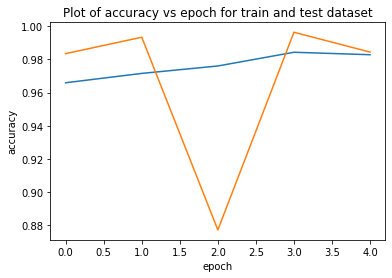

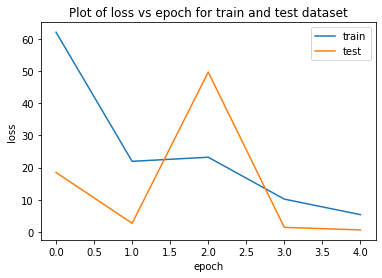

In [29]:
# Plot of accuracy vs epoch for train and test dataset
import matplotlib.pyplot as plt
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [30]:
cnnpredictions = cnnmodel.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)

y_pred = cnnmodel.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

cnn_acc = accuracy_score(y_pred, y_test)
cnn_prec = precision_score(y_pred, y_test,average='weighted')
cnn_rec = recall_score(y_pred, y_test,average='weighted')
cnn_f1 = f1_score(y_pred, y_test,average='weighted')

#storeResults('CNN',dl_acc,dl_prec,dl_rec,dl_f1)

624/624 [==============================] - 0s 534us/step


In [70]:
storeResults('CNN',cnn_acc,cnn_prec,cnn_rec,cnn_f1)

# CNN LSTM

In [35]:
import tensorflow as tf
tf.keras.backend.clear_session()

model_en = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model_en.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model_en.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 64)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 32)             6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 8, 128)            82432     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [36]:
modelhistory = model_en.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = 2)

Epoch 1/5
31938/31938 [==============================] - 202s 6ms/step - loss: 0.0327 - acc: 0.9700 - val_loss: 0.0251 - val_acc: 0.9755
Epoch 2/5
31938/31938 [==============================] - 201s 6ms/step - loss: 0.0295 - acc: 0.9695 - val_loss: 0.0198 - val_acc: 0.9802
Epoch 3/5
31938/31938 [==============================] - 200s 6ms/step - loss: 0.0227 - acc: 0.9778 - val_loss: 0.0188 - val_acc: 0.9804
Epoch 4/5
31938/31938 [==============================] - 198s 6ms/step - loss: 0.0221 - acc: 0.9787 - val_loss: 0.0205 - val_acc: 0.9796
Epoch 5/5
31938/31938 [==============================] - 202s 6ms/step - loss: 0.0218 - acc: 0.9787 - val_loss: 0.0194 - val_acc: 0.9803


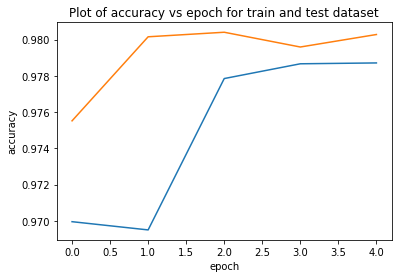

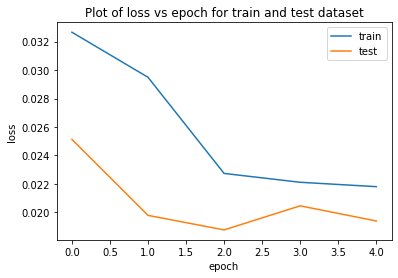

In [37]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['acc'])
plt.plot(modelhistory.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [38]:
y_pred = model_en.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ense_acc = accuracy_score(y_pred, y_test)
ense_prec = precision_score(y_pred, y_test,average='weighted')
ense_rec = recall_score(y_pred, y_test,average='weighted')
ense_f1 = f1_score(y_pred, y_test,average='weighted')

#storeResults('CNNLSTM-NIDS',dl_acc,dl_prec,dl_rec,dl_f1)

624/624 [==============================] - 2s 2ms/step


In [71]:
storeResults('CNN + LSTM',ense_acc,ense_prec,ense_rec,ense_f1)

# LSTM

In [40]:
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM,GRU, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [41]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X)

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [43]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_X=X_train
val_X=X_test

In [44]:
## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))

In [45]:
## Recuperation des labels
train_y=y_train
val_y=y_test

In [46]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [57]:
inputs1=Input((1,10))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [58]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
history=model1.fit(train_X, train_y,epochs=5,batch_size=2, validation_data=(val_X, val_y),steps_per_epoch=100,validation_steps=100)

Epoch 1/5
100/100 [==============================] - 7s 35ms/step - loss: 0.6385 - accuracy: 0.9054 - val_loss: 0.3664 - val_accuracy: 0.9550
Epoch 2/5
100/100 [==============================] - 2s 24ms/step - loss: 0.3101 - accuracy: 0.9229 - val_loss: 0.1327 - val_accuracy: 0.9550
Epoch 3/5
100/100 [==============================] - 2s 24ms/step - loss: 0.1586 - accuracy: 0.9312 - val_loss: 0.1115 - val_accuracy: 0.9550
Epoch 4/5
100/100 [==============================] - 2s 24ms/step - loss: 0.0801 - accuracy: 0.9781 - val_loss: 0.1008 - val_accuracy: 0.9550
Epoch 5/5
100/100 [==============================] - 2s 25ms/step - loss: 0.0783 - accuracy: 0.9704 - val_loss: 0.0763 - val_accuracy: 0.9550


In [60]:
# evaluate the model
_, train_acc = model1.evaluate(train_X, train_y, verbose=0)
_, test_acc = model1.evaluate(val_X, val_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.953, Test: 0.954


In [72]:
y_pred = model1.predict(val_X, verbose=1)
y_pred = np.argmax(y_pred,axis=1)
lstm_acc = test_acc
lstm_prec = precision_score(y_pred, val_y,average='weighted')
lstm_rec = recall_score(y_pred, val_y,average='weighted')
lstm_f1 = f1_score(y_pred, val_y,average='weighted')

936/936 [==============================] - 3s 3ms/step


In [74]:
storeResults('LSTM',lstm_acc,lstm_prec,lstm_rec,lstm_f1)

# Comparison

In [75]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : fscore,
                        'Recall'   : recall,
                        'Precision': precision,
                        
                      })

In [76]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,CNN,0.985,0.986,0.985,0.987
1,CNN + LSTM,0.981,0.983,0.981,0.986
2,LSTM,0.954,0.133,0.071,1.000


# Modelling

In [77]:
cnnmodel.save('model_cnn.h5')
model_en.save('model_hyd.h5')

# Graph

In [78]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

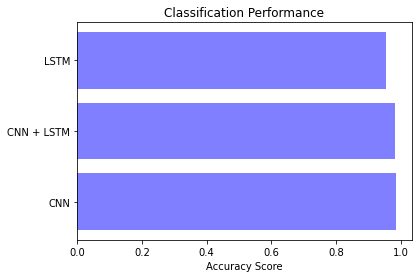

In [79]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

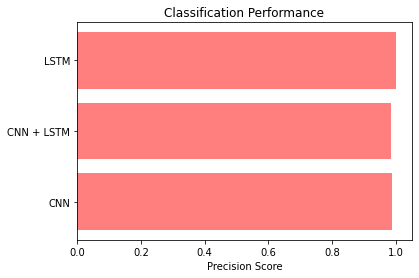

In [80]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

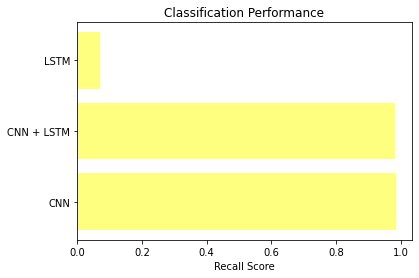

In [81]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

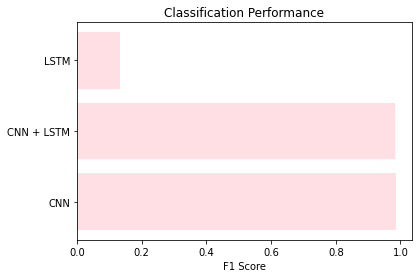

In [82]:
plt2.barh(y_pos, fscore, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()